# Grand Circus Capstrone Project 002
### Andrew & Joe's Data Analysis
IMDB MOVIES/SHOWS REPORT

Files available:
- name.basics.tsv
- title.akas.tsv
- title.basics.tsv
- title.crew.tsv
- title.episode.tsv
- title.principals.tsv
- title.ratings.tsv

### Inports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


### Setting up File Location Variables

In [2]:
#   Joe's paths...
file1 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\name.basics.tsv/data.tsv'
file2 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.akas.tsv/data.tsv'
file3 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.basics.tsv/data.tsv'
file4 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.crew.tsv/data.tsv'
file5 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.episode.tsv/data.tsv'
file6 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.principals.tsv/data.tsv'
file7 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.ratings.tsv/data.tsv'

#   Andrew's paths
# file1 = 'name.basics.tsv/data.tsv'
# file2 = 'title.akas.tsv/data.tsv'
# file3 = 'title.basics.tsv/data.tsv'
# file4 = 'title.crew.tsv/data.tsv'
# file5 = 'title.episode.tsv/data.tsv'
# file6 = 'title.principals.tsv/data.tsv'
# file7 = 'title.ratings.tsv/data.tsv'

print(file1)
print(file2)
print(file3)
print(file4)
print(file5)
print(file6)
print(file7)


C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\name.basics.tsv/data.tsv
C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.akas.tsv/data.tsv
C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.basics.tsv/data.tsv
C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.crew.tsv/data.tsv
C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.episode.tsv/data.tsv
C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.principals.tsv/data.tsv
C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.ratings.tsv/data.tsv


## Reading in title.basics.tsv and title.ratings.tsv
- movies_df = title.basics.tsv = file3
- ratings_df = title.ratings.tsv = file7

In [3]:
movies_df = pd.read_csv(file3, sep='\t')
ratings_df = pd.read_csv(file7, sep='\t')


C:\Users\JMerten\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Filter Movies and Remove Missing Genre Information

In [4]:
# movies_df = pd.read_csv(file3, sep='\t')
movies_df = movies_df[movies_df['titleType'] == 'movie']  # Filter the DataFrame to include only movies (titleType == 'movie')

# Remove rows with missing genre information
movies_df = movies_df.dropna(subset=['genres'])




## Count Genres in Movies DataFrame


In [5]:
# Create a dictionary to store genre counts
genre_counts = {}

# Iterate over each row and count the genres
for genres in movies_df['genres']:
    genre_list = genres.split(',')
    for genre in genre_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1


## Find the Most Popular Genre


In [6]:
# Find the genre with the highest count
most_popular_genre = max(genre_counts, key=genre_counts.get)
count = genre_counts[most_popular_genre]

print(f"The most popular genre is {most_popular_genre} with a count of {count}.")


The most popular genre is Drama with a count of 234447.


## Reading in two CSV files
## Isn't this redundant?  We've already read in file3 & file7, I think.

In [7]:
# file7_df = pd.read_csv(file7, sep='\t')
# basics_df = pd.read_csv(file3, sep='\t')
# ratings_df = pd.read_csv(file7, sep='\t')

## Merge DataFrames


In [8]:
# Merge basics_df and ratings_df on the 'tconst' column
merged_df = pd.merge(movies_df, ratings_df, on='tconst')


## Filter Movies and Remove Missing Information

In [9]:
# Filter the merged DataFrame to include only movies (titleType == 'movie')
movies_df = merged_df[merged_df['titleType'] == 'movie']

# Remove rows with missing genre or rating information
movies_df = movies_df.dropna(subset=['genres', 'averageRating'])


## Calculate Genre Ratings

In [10]:
# Create a dictionary to store genre ratings
genre_ratings = {}

# Iterate over each row and calculate the average rating for each genre
for index, row in movies_df.iterrows():
    genres = row['genres'].split(',')
    rating = row['averageRating']
    
    for genre in genres:
        if genre in genre_ratings:
            genre_ratings[genre].append(rating)
        else:
            genre_ratings[genre] = [rating]


## Calculate Average Genre Ratings and Find the Highest Rated Genre


In [11]:
# Calculate the average rating for each genre
average_ratings = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_ratings.items()}

# Find the genre with the highest average rating
highest_rated_genre = max(average_ratings, key=average_ratings.get)
average_rating = average_ratings[highest_rated_genre]

print(f"The highest rated genre is {highest_rated_genre} with an average rating of {average_rating}.")


The highest rated genre is Game-Show with an average rating of 8.9.


## Filter Movies and Remove Missing Data


In [12]:
# Filter the merged DataFrame to include only movies (titleType == 'movie')
movies_df = merged_df[merged_df['titleType'] == 'movie']

# Remove rows with missing startYear or averageRating information
movies_df = movies_df.dropna(subset=['startYear', 'averageRating'])


## Create a new 'decade' column by rounding down the 'startYear' to the nearest 10


In [33]:
# Convert the 'startYear' column to numeric
movies_df['startYear'] = pd.to_numeric(movies_df['startYear'], errors='coerce')

# Create a new 'decade' column by rounding down the 'startYear' to the nearest 10
movies_df['decade'] = (movies_df['startYear'] // 10) * 10


## Group the DataFrame by 'decade' and calculate the average rating


In [37]:
average_ratings_by_decade = movies_df.groupby('decade')['averageRating'].mean()
decade_rating_df = average_ratings_by_decade.to_frame()

## Sort the average ratings in descending order

In [28]:
# average_ratings_by_decade = average_ratings_by_decade.sort_values(ascending=False)

## Print the average ratings by decade


In [29]:
# print("Average Ratings by Decade:")
# for decade in sorted(average_ratings_by_decade.keys()):
#     rating = average_ratings_by_decade[decade]
#     print(f"Decade: {decade}s")
#     print(f"Average Rating: {rating}")
#     print("-------------------")


### Print the average ratings by decade - sorted by rating.

In [30]:
#   sorted(average_ratings_by_decade.keys())
print(average_ratings_by_decade)

decade
2020.0    6.386861
2010.0    6.243501
1950.0    6.215964
1940.0    6.208831
2000.0    6.205812
1960.0    6.148703
1920.0    6.104818
1930.0    6.093716
1990.0    6.030797
1980.0    6.014338
1970.0    5.960906
1910.0    5.794098
1900.0    4.465060
1890.0    4.450000
Name: averageRating, dtype: float64


### Print the average ratings by decade - sorted by decade.

In [23]:
print(average_ratings_by_decade.sort_index(ascending=False))

decade
2020.0    6.386861
2010.0    6.243501
2000.0    6.205812
1990.0    6.030797
1980.0    6.014338
1970.0    5.960906
1960.0    6.148703
1950.0    6.215964
1940.0    6.208831
1930.0    6.093716
1920.0    6.104818
1910.0    5.794098
1900.0    4.465060
1890.0    4.450000
Name: averageRating, dtype: float64


### Graph the average ratings by decade - sorted by decade.

In [39]:
print(type(decade_rating_df))
print(decade_rating_df)

<class 'pandas.core.frame.DataFrame'>
        averageRating
decade               
1890.0       4.450000
1900.0       4.465060
1910.0       5.794098
1920.0       6.104818
1930.0       6.093716
1940.0       6.208831
1950.0       6.215964
1960.0       6.148703
1970.0       5.960906
1980.0       6.014338
1990.0       6.030797
2000.0       6.205812
2010.0       6.243501
2020.0       6.386861


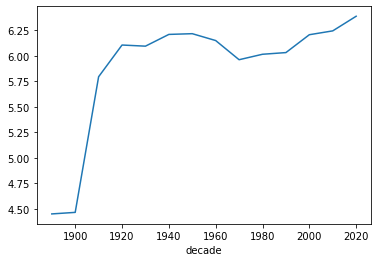

In [45]:
sns.lineplot(
    average_ratings_by_decade.index, average_ratings_by_decade.values
#     , col="dataset", hue="dataset",
#     col_wrap=2, palette="muted", ci=None,
#     height=4, scatter_kws={"s": 50, "alpha": 1}
)
# average_ratings_by_decade.index, average_ratings_by_decade.values

### Visualization containing one quantitative and one categorical variable - Average Rating by genre

In [54]:
print(average_ratings)
print(type(average_ratings))

{'Romance': 6.101617308577602, 'Documentary': 7.231072166322352, 'News': 7.215174506828522, 'Sport': 6.624194903388424, '\\N': 6.19018544091538, 'Action': 5.716960709675343, 'Adventure': 5.8671054796775035, 'Biography': 6.9610375275937955, 'Drama': 6.251183780049845, 'Fantasy': 5.897538566243208, 'Comedy': 5.910845899636147, 'War': 6.4090596330275575, 'Crime': 5.986566457568941, 'Family': 6.2157433628318435, 'History': 6.809881860694093, 'Sci-Fi': 5.32898592775281, 'Thriller': 5.60443926189601, 'Western': 5.8190984578884875, 'Mystery': 5.859399571122226, 'Horror': 5.00368805771787, 'Music': 6.681429098511915, 'Animation': 6.373142292490114, 'Musical': 6.1797869006581045, 'Film-Noir': 6.46655290102389, 'Adult': 5.56764773511151, 'Reality-TV': 6.59811320754717, 'Talk-Show': 6.278571428571428, 'Short': 7.661538461538462, 'Game-Show': 8.9}
<class 'dict'>


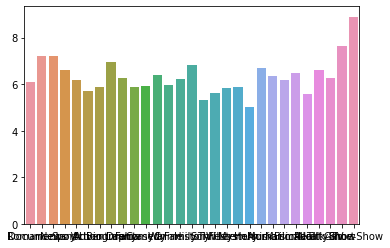

In [55]:
keys = list(average_ratings.keys())
# get values in the same order as keys, and parse percentage values
vals = [average_ratings[k] for k in keys]
sns.barplot(x=keys, y=vals)

### Visualization containing one quantitative and one categorical variable - Average Rating by genre

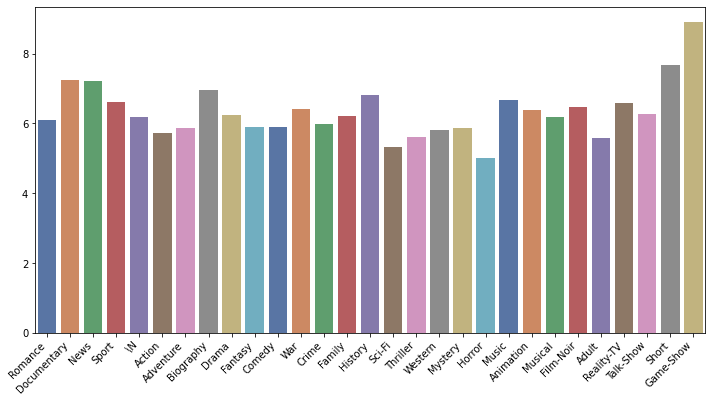

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
chart = sns.barplot(x=keys, y=vals, palette=sns.color_palette("deep", n_colors=len(keys)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Next Steps
1. When running pd.read_csv, use the file name variable instead of hard coded name.(Andrew) (Finished)
1. Rename variables for dataframes (_df for dataframes) (Andrew) (Finished)
1. For decades, print it out a second time by decade. (Joe)
1. for decades, lets print out a line graph by decade.(Joe)
1. before each block of code, add a markdown to explain what is happening.(Andrew) (Finished)
1. average rating by actor(Joe Optional)
1. Idenitfy the three different visualizations we need. (Andrew)
   - Visualization containing two quantitative variables (Joe) (Line Graph-rating by decade)
   - Visualization containing one quantitative and one categorical variable (Joe) (Bar Graph-Count by genre/Rating by genre)
   - Visualization containing distribution information of quantitative variable(s) (Joe) (Scatter plot/Linerar Regression-rating by year?)
1. We are only using two CSV files currently and we need to be using three
    - Find out how to make average rating by actor work
    - If we cannot, discuss new tables we want to compare.
1. Power BI dashboard (Optional) (Andrew)
